## Chapter 4 Problem 4.63: Starter Program
### Caffeine Populated Unit Cell

#### From: M. Julian, [*Foundations of Crystallography with Computer Applications Third Edition*](https://www.crcpress.com/Foundations-of-Crystallography-with-Computer-Applications/Julian/p/book/9781466552913). CRC Press, Taylor & Francis, Boca Raton

#### References
 - See *Chapter 1 Problem 1.09 Starter Program* for installation of Python, Jupyter, Numpy, and Matplotlib
 - Data Source: Cambridge Structure Database: cafine01

In [1]:
import numpy as np 
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import axis3d
np.set_printoptions(precision=4, suppress=True) # suppress means numbers close to zero printed as zero
%matplotlib notebook

In [2]:
# Student enter in your own a, b, c, alpha, beta, gamma

# Lattice information for the unit cell
a = 3.974               # Crystallographic a axis (Å, angstroms)
b = 16.751              # Crystallographic b axis (Å, angstroms)
c = 14.800              # Crystallographic c axis (Å, angstroms)
alpha = 90              # Angle between b and c  (degrees)
beta = 95.80            # Angle between a and c  (degrees)
gamma = 90              # Angle between a and b  (degrees)

# f"a string {variable}" prints formatted text with variables inside curly braces {}
# : 8.3f  space means left padded with space, 8 characters total width (including .), 3 decimals after periods
print(f"a     = {a: 8.3f} Å")
print(f"b     = {b: 8.3f} Å")
print(f"c     = {c: 8.3f} Å")
print(f"alpha = {alpha: 8.3f} degrees")
print(f"beta  = {beta: 8.3f} degrees")
print(f"gamma = {gamma: 8.3f} degrees")
  

a     =    3.974 Å
b     =   16.751 Å
c     =   14.800 Å
alpha =   90.000 degrees
beta  =   95.800 degrees
gamma =   90.000 degrees


In [3]:
def sind(angle_degrees):
    """sine in degrees"""  #python """ string to document functions
    angle_radians = np.deg2rad(angle_degrees)
    return np.sin(angle_radians)

def cosd(angle_degrees):
    """cosine in degrees"""
    angle_radians = np.deg2rad(angle_degrees)
    return np.cos(angle_radians)

def initial_axis():
    """prints the unit cell with a axis red, b axis green, c axis blue"""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # makes sure that projection is not perspective, but orthogonal
    ax.set_proj_type('ortho')
    
    # defines the aspect of the axes in figure space to be equal
    ax.set_box_aspect(aspect = (1,1,1))
    
    # comment to add grid lines
    ax.axis('off')
    
    ax.plot(outline_cartesian[0], outline_cartesian[1], outline_cartesian[2],'k',linewidth=.5)    # plots black outline of cell
    ax.plot(outline_red_cartesian[0], outline_red_cartesian[1],outline_red_cartesian[2],'r',linewidth=3)  #plots a axis red
    ax.plot(outline_green_cartesian[0], outline_green_cartesian[1],outline_green_cartesian[2],'g',linewidth=3)  #plots b axis green
    ax.plot(outline_blue_cartesian[0], outline_blue_cartesian[1], outline_blue_cartesian[2], 'b', linewidth=3)  #plots c axis blue
    return ax


def cartesian_view(ax, x, y, z):
    """places 3d camera at x, y, z position looking back at the origin """
    azimuth = np.rad2deg(np.arctan2(y,x))
    elevation = np.rad2deg(np.arctan2(z, np.sqrt(x**2 + y**2)))
    ax.view_init(azim=azimuth, elev=elevation)

In [4]:
# Create conversion to cartesian matrix from crystallographic parameters a, b, c and angles alpha, beta, gamma

c1 = c * cosd(beta)
c2 = (c * cosd(alpha) - cosd(gamma) * cosd(beta)) / sind(gamma)
c3 = np.sqrt(abs(c ** 2 - c1 ** 2 - c2 ** 2))


conversion_to_cartesian = np.array([
       [a, b*cosd(gamma), c1],
       [0, b*sind(gamma), c2],
       [0, 0,             c3]
    ])

#print(conversion_to_cartesian)

In [5]:
# 3 dimensional outline represented by a 3 * 16 matrix
outline = np.array(
    [
        [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0]
    ]
)

outline_cartesian = np.dot(conversion_to_cartesian, outline)

# Color a axis red
outline_red = np.array(
    [
        [ 0, 1], # note comma between lists [], []
        [ 0, 0],
        [ 0, 0]
    ]
)

outline_red_cartesian = np.dot(conversion_to_cartesian, outline_red)

# Color b axis green
outline_green = np.array(
    [
        [ 0, 0], # note comma between lists [], []
        [ 0, 1],
        [ 0, 0]
    ]
)
outline_green_cartesian = np.dot(conversion_to_cartesian, outline_green)

# Color c axis blue
outline_blue = np.array(
    [
        [ 0, 0], # note comma between lists [], []
        [ 0, 0],
        [ 0, 1]
    ]
)

outline_blue_cartesian = np.dot(conversion_to_cartesian, outline_blue)
print(outline_blue_cartesian)

[[ 0.     -1.4956]
 [ 0.      0.    ]
 [ 0.     14.7242]]


Now that the unit cell has be completed, the atoms and bond lenghts can be inserted and the projections made.

In [6]:
# Student: Enter the fractional coordinates of asymmetric unit for your crystal from cif

# Python dictionaries are defined with curly braces {key1: value1, key2: value2}
#   value1 in this case is a python list []

atoms_AU ={ 
    'C1':[ 0.1908, 0.3252, 0.0862],
    'C2':[-0.1012, 0.2789, 0.2400],
    'C3':[ 0.1349, 0.2466, 0.1040],
    'C4':[ 0.1126, 0.3879, 0.1444]
          }
print(atoms_AU) 

{'C1': [0.1908, 0.3252, 0.0862], 'C2': [-0.1012, 0.2789, 0.24], 'C3': [0.1349, 0.2466, 0.104], 'C4': [0.1126, 0.3879, 0.1444]}


In [7]:
# Student: Create bond.  Here the molecule is traced by not 'lifting up the pen'.  AU is asymmetric unit

atoms_AU_Bond =np.array([
    atoms_AU['C2'],
    atoms_AU['C3'],
    atoms_AU['C4']
                        ])

print(atoms_AU_Bond)

[[-0.1012  0.2789  0.24  ]
 [ 0.1349  0.2466  0.104 ]
 [ 0.1126  0.3879  0.1444]]


In [8]:
# Student: Atoms are grouped by element. This is so you can color the individual atoms and control the size. 
Carbon_Atoms_AU = np.array([
    atoms_AU['C1'],
    atoms_AU['C2'],
    atoms_AU['C3'],
    atoms_AU['C4']
 ])   
print(Carbon_Atoms_AU)

[[ 0.1908  0.3252  0.0862]
 [-0.1012  0.2789  0.24  ]
 [ 0.1349  0.2466  0.104 ]
 [ 0.1126  0.3879  0.1444]]


In [9]:
# Student: Here are symmetry operations.  Put in your own symmetry operations. 

# Keep molecules in the unit cell by adding 1 to negative symmetry coordinate such as -x becomes 1-x 
# For example -x,-y,-z becomes 1-x,1-y,1-z or -x,.5+y, .5-y becomes 1-x,.5+y, .5-y   

def symmetry_coordinate_1(a):#identity
    x=a[0]
    y=a[1]
    z=a[2]
    return [x,y,z]
def symmetry_coordinate_2(a):#inversion
    x=a[0]
    y=a[1]
    z=a[2]
    return [1-x, 1-y, 1-z]
def symmetry_coordinate_3(a):#screw
    x=a[0]
    y=a[1]
    z=a[2]
    return [1-x, .5+y, .5-z]


In [10]:
def plot_xyz(a, color):
    ax.plot(a[0], a[1], a[2], color)

def apply_symmetry(symmetry_function, atoms):
    atoms_with_symmetry = np.apply_along_axis(symmetry_function, 1, atoms)
    return np.dot(conversion_to_cartesian, atoms_with_symmetry.T)

def plot_molecule(points, color, linewidth = 1, markersize = 2):
    ax.plot(points[0], points[1], points[2], color,linewidth = linewidth, markersize = markersize)



<IPython.core.display.Javascript object>


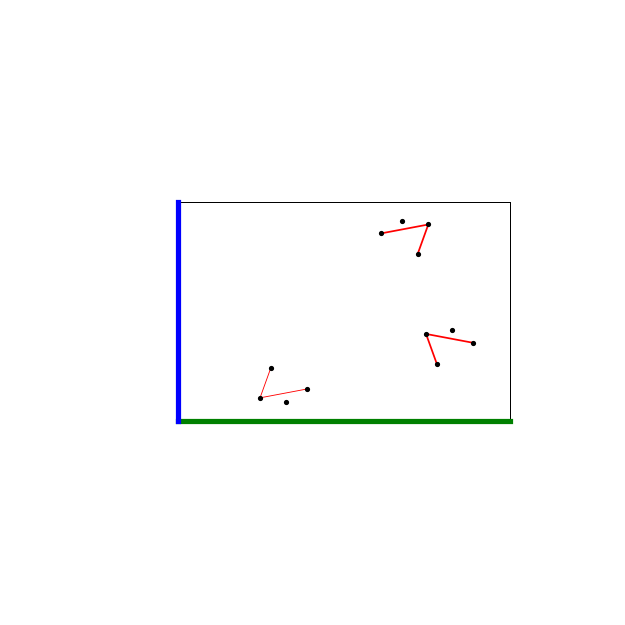

In [11]:
ax = initial_axis() # Creates unit cell with a axis red, b axis green, c axis blue

# Set camera view along axis
along_axis = np.dot(conversion_to_cartesian, [1,0,0])    # a axis
# along_axis = np.dot(conversion_to_cartesian, [0,1,0])  # b axis
# along_axis = np.dot(conversion_to_cartesian, [0,0,1])  # c axis
cartesian_view(ax, along_axis[0], along_axis[1], along_axis[2])

#########################################
# Set x, y and z axis to have the same range
#  The range needs to be bigger than the longest unit cell length

zoom=15 # z is zoom10, allows control of size of picture, smaller number larger picture
ax.set_xlim(0,zoom)
ax.set_ylim(0,zoom)
ax.set_zlim(0,zoom)

    
plot_molecule(apply_symmetry(symmetry_coordinate_1, atoms_AU_Bond), 'r', linewidth = .5)
plot_molecule(apply_symmetry(symmetry_coordinate_1, Carbon_Atoms_AU), 'ko')

plot_molecule(apply_symmetry(symmetry_coordinate_2, atoms_AU_Bond), 'r')
plot_molecule(apply_symmetry(symmetry_coordinate_2, Carbon_Atoms_AU), 'ko')

plot_molecule(apply_symmetry(symmetry_coordinate_3, atoms_AU_Bond), 'r')
plot_molecule(apply_symmetry(symmetry_coordinate_3, Carbon_Atoms_AU), 'ko')


Carbon_Atoms_AU
# This should be the last statement before the graph
plt.show()

# ATTENTION: if picture does not look good, try menu item Cell | All output | Toggle Scrolling
